In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)



Using TensorFlow backend.


In [2]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()
print("X_train.shape={} , y_train.shape={}".format(X_train.shape,y_train.shape))
print("X_test.shape={} , y_test.shape={}".format(X_test.shape,y_test.shape))

11493376/11490434 [==============================] - 291s 25us/step

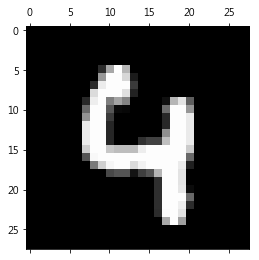

In [49]:
first_train_img = np.reshape(X_train[14390, :], (28, 28))
plt.matshow(first_train_img, cmap = plt.get_cmap('gray'))
plt.show()

In [37]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test   = X_test.reshape(X_test.shape[0] , 28 , 28 , 1).astype("float32")
print("X_train.shape={}".format(X_train.shape))
print("X_test.shape={}".format(X_test.shape))

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


In [39]:
X_train = X_train / 255
X_test   = X_test / 255

In [51]:
# One hot encoding.
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

In [53]:
##### Start to build  CNN model ####
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D

In [106]:
#####   Key point !!!!  #####
model = Sequential()

# 1st layer
# Convolution layer.
model.add(Conv2D(filters=16 , kernel_size=(5,5) , padding="same" , input_shape=(28,28,1) , activation="relu"))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# 2nd layer
# Convolution layer
model.add(Conv2D(filters=36 , kernel_size=(5,5) , padding="same",activation='relu' ))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd layer
# Convolution layer
model.add(Conv2D(filters=72 , kernel_size=(5,5),padding="same" , activation="relu"))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout layer
model.add(Dropout(0.25))


# Flatten
model.add(Flatten())

##### DNN start ###
# Fully connected layer
model.add(Dense(128 , activation='relu'))
# Dropout layer
model.add(Dropout(0.5))
# Output layer
model.add(Dense(10 , activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 72)          64872     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 72)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3, 3, 72)          0         
__________

In [107]:
# Decide loss-function , optimizer  & history metrics 
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [108]:
# Start to train model.
train_history = model.fit(
    x = X_train , 
    y = y_train ,
    validation_data = (X_test , y_test) ,
    validation_split = 0.2 ,
    epochs = 10,
    batch_size = 300 ,
    verbose = 2
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 71s - loss: 0.4590 - acc: 0.8532 - val_loss: 0.0679 - val_acc: 0.9777
Epoch 2/10
 - 75s - loss: 0.1063 - acc: 0.9687 - val_loss: 0.0411 - val_acc: 0.9864
Epoch 3/10
 - 73s - loss: 0.0727 - acc: 0.9790 - val_loss: 0.0300 - val_acc: 0.9896
Epoch 4/10
 - 72s - loss: 0.0568 - acc: 0.9833 - val_loss: 0.0265 - val_acc: 0.9910
Epoch 5/10
 - 71s - loss: 0.0496 - acc: 0.9852 - val_loss: 0.0279 - val_acc: 0.9910
Epoch 6/10
 - 73s - loss: 0.0395 - acc: 0.9882 - val_loss: 0.0210 - val_acc: 0.9921
Epoch 7/10
 - 77s - loss: 0.0340 - acc: 0.9897 - val_loss: 0.0238 - val_acc: 0.9917
Epoch 8/10
 - 72s - loss: 0.0307 - acc: 0.9910 - val_loss: 0.0190 - val_acc: 0.9932
Epoch 9/10
 - 71s - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0249 - val_acc: 0.9905
Epoch 10/10
 - 71s - loss: 0.0256 - acc: 0.9921 - val_loss: 0.0186 - val_acc: 0.9934


In [93]:
# Defining evaluation chart
def show_train_history(train_history,file_name):
    plt.figure(0,figsize=(8,6))
    plt.subplot(121)
    plt.plot(train_history.history["acc"])
    plt.plot(train_history.history["val_acc"])
    plt.title("Training acc")
    plt.ylabel("train")
    plt.xlabel("Epoch")
    plt.legend(["train","validation"] , loc = "upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Training loss")
    plt.ylabel("train")
    plt.xlabel("Epoch")
    plt.legend(["train","validation"] , loc = "upper left")
    plt.savefig(file_name,dpi=300,format='png')
    plt.show()

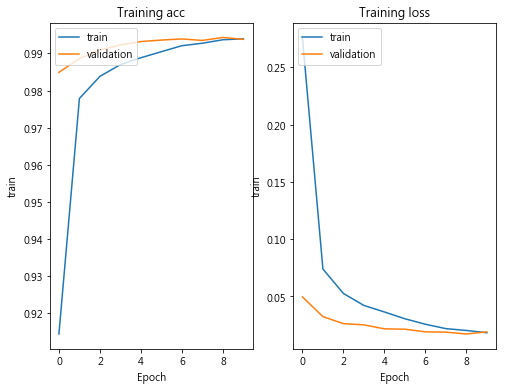

In [98]:
show_train_history(train_history,"cnn-test/cnn2_32_72_256.png")
# show_train_history(train_history")

In [99]:
# Evaluating testing dataset score
scores = model.evaluate(X_test , y_test)
scores[1]

10000/10000 [==============================] - 7s 739us/step

0.9938

In [100]:
import pandas as pd
prediction = model.predict_classes(X_test)
print(y_test.shape)
pd.crosstab(y_test_categories , prediction , rownames=["label"] , colnames=["predict"])

(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1135,0,0,0,0,0,0,0,0
2,1,2,1024,1,0,0,0,4,0,0
3,0,0,0,1006,0,3,0,0,1,0
4,0,0,0,0,978,0,0,1,0,3
5,0,0,0,4,0,886,1,0,0,1
6,7,2,0,0,1,1,947,0,0,0
7,0,3,1,0,0,0,0,1021,1,2
8,3,0,2,1,0,1,0,0,965,2


In [84]:
print(type(prediction))
print(type(y_test_categories))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
